In [ ]:
import glob
import matplotlib.pyplot as plt
import mne
import numpy as np
import pyxdf

In [44]:
# load baseline file names
baseline_list = []
path = 'data/**/*S001*.xdf'
for file in glob.glob(path, recursive=True):
    baseline_list.append(file)
print(baseline_list[0])

data/gme2022/sub-Tobias/ses-S001/eeg/sub-Tobias_ses-S001_task-Default_run-001_eeg.xdf


In [45]:

# load experiment file names
experiment_list = []
path = 'data/**/*S002*.xdf'
for file in glob.glob(path, recursive=True):
    experiment_list.append(file)
print(experiment_list[0])


data/gme2022/sub-Tobias/ses-S002/eeg/sub-Tobias_ses-S002_task-Default_run-001_eeg.xdf


In [47]:
# read baseline and cut it to 40 sec
sfreq = 250
info = mne.create_info(8, sfreq, ["eeg"] * 8)

baseline_mne_list = []
for baseline in baseline_list:
    streams, _ = pyxdf.load_xdf(baseline)
    try:
        data = streams[1]["time_series"].T[:8]
    except AttributeError:
        # some recordings miss the marker channel
        data = streams[0]["time_series"].T[:8]
    raw = mne.io.RawArray(data, info, verbose=False)
    raw = raw.crop(tmin=1, tmax=41)
    baseline_mne_list.append(raw)

Stream 3: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.
Stream 1: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.
Stream 4: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.
Stream 3: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.


Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/tmp/ipykernel_1045731/1156392459.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(tmax=np.inf, fmax=125)


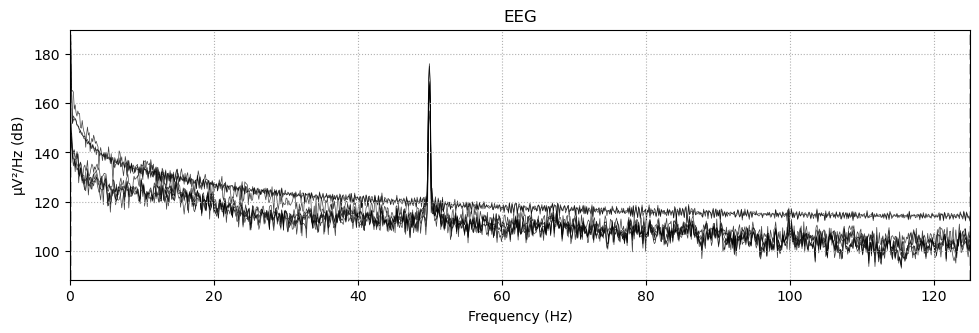

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 sec)

Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/tmp/ipykernel_1045731/1156392459.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_notch.plot_psd(tmax=np.inf, fmax=125);


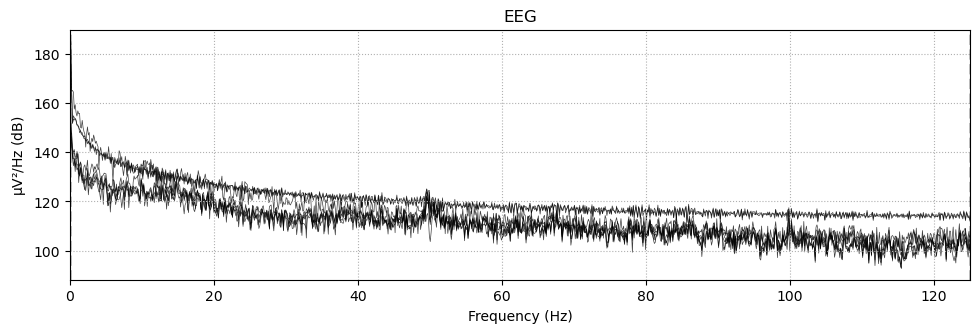

In [49]:
raw = baseline_mne_list[0]
raw.plot_psd(tmax=np.inf, fmax=125)

# filter power line noise
freqs = (50)
raw_notch = raw.copy().notch_filter(freqs=freqs)
raw_notch.plot_psd(tmax=np.inf, fmax=125);


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 825 samples (3.300 sec)

Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/tmp/ipykernel_1045731/58215315.py:10: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filt.plot_psd(tmax=np.inf, fmin=fmin, fmax=fmax);


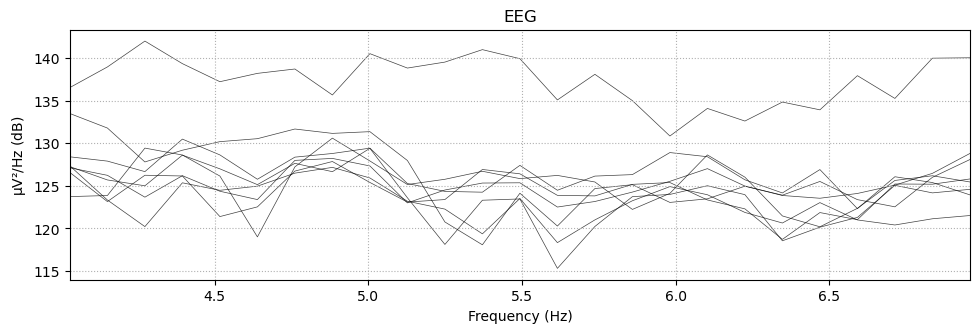

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 825 samples (3.300 sec)

Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/tmp/ipykernel_1045731/58215315.py:10: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filt.plot_psd(tmax=np.inf, fmin=fmin, fmax=fmax);


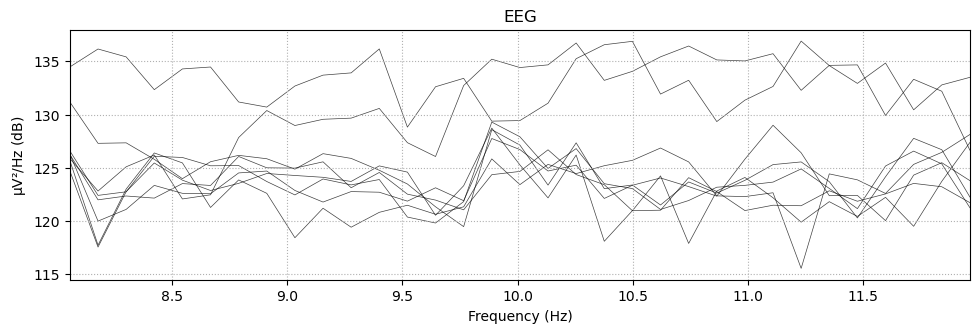

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 25.50 Hz)
- Filter length: 825 samples (3.300 sec)

Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/tmp/ipykernel_1045731/58215315.py:10: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filt.plot_psd(tmax=np.inf, fmin=fmin, fmax=fmax);


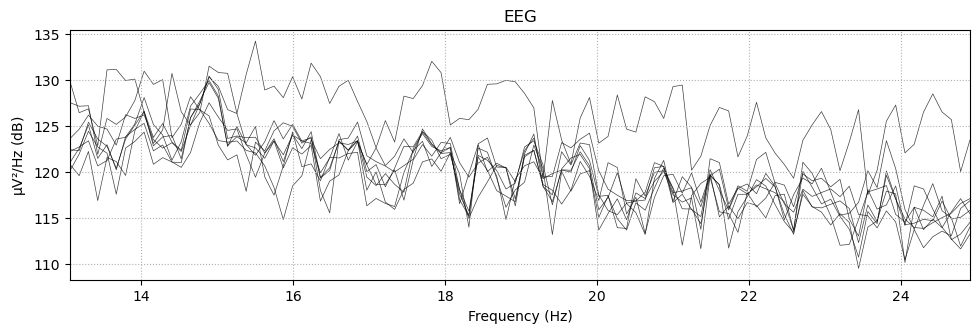

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 29.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 50.50 Hz)
- Filter length: 825 samples (3.300 sec)

Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/tmp/ipykernel_1045731/58215315.py:10: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filt.plot_psd(tmax=np.inf, fmin=fmin, fmax=fmax);


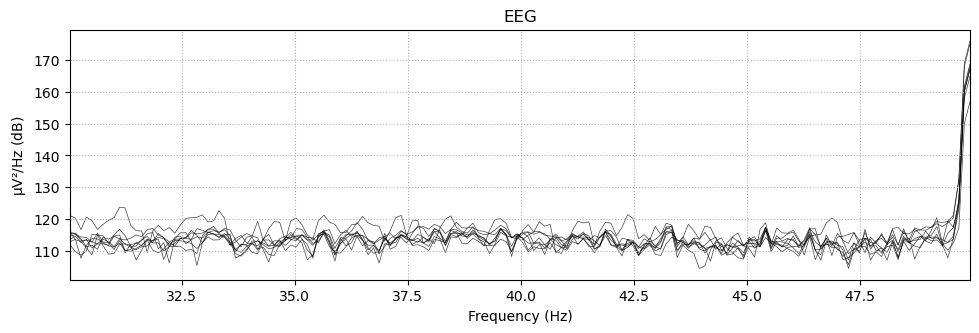

In [51]:
# a first try to print bands for one example file
raw = baseline_mne_list[0]
iter_freqs = [("Theta", 4, 7), ("Alpha", 8, 12), ("Beta", 13, 25), ("Gamma", 30, 50)]

for start in range(0, 2, 2):
    raw_crop = raw.copy().crop(tmin=start, tmax=start+2)
    for band, fmin, fmax in iter_freqs:
        raw_filt = raw.copy()
        raw_filt.filter(fmin, fmax, n_jobs=1, l_trans_bandwidth=1, h_trans_bandwidth=1)
        raw_filt.plot_psd(tmax=np.inf, fmin=fmin, fmax=fmax);


In [ ]:
def eeg_power_band(epochs):
    """EEG relative power band feature extraction.

    This function takes an ``mne.Epochs`` object and creates EEG features based
    on relative power in specific frequency bands that are compatible with
    scikit-learn.

    Parameters
    ----------
    epochs : Epochs
        The data.

    Returns
    -------
    X : numpy array of shape [n_samples, 5]
        Transformed data.
    """
    # specific frequency bands
    FREQ_BANDS = {"delta": [0.5, 4.5],
                  "theta": [4.5, 8.5],
                  "alpha": [8.5, 11.5],
                  "sigma": [11.5, 15.5],
                  "beta": [15.5, 30]}

    psds, freqs = psd_welch(epochs, picks='eeg', fmin=0.5, fmax=30.)
    # Normalize the PSDs
    psds /= np.sum(psds, axis=-1, keepdims=True)

    X = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_band = psds[:, (freqs >= fmin) & (freqs < fmax)].mean(axis=-1)
        X.append(psds_band.reshape(len(psds), -1))

    return np.concatenate(X, axis=1)

In [ ]:
from mne.time_frequency import psd_welch

for start in range(0, 2, 2):
    raw_crop = raw.copy().crop(tmin=start, tmax=start+2)
    tmp = eeg_power_band(raw_crop)
    print(tmp)
